In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('PlantVillage.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
Imaze_Size=256
Batch_Size=32

In [ ]:
channels=3

In [ ]:
#this is api
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(Imaze_Size,Imaze_Size),
    batch_size=Batch_Size
)

Found 2152 files belonging to 3 classes.


In [ ]:
#folder names are class names
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

```
this 68 show that there are 68 bach eack of bach_size=32
so total data=68*32=2176
it should come exact
```



In [ ]:
#explore
for image_batch,label_batch in dataset.take(1):#take()return a tuple which contain data,label
  print(image_batch.shape)
  print(label_batch.numpy()) #need to convert into numpy because it return tensor

(32, 256, 256, 3)
[1 1 0 0 1 2 1 0 1 1 0 0 1 0 0 0 0 0 0 2 1 1 2 2 0 1 1 1 2 0 1 0]


<font color='red'>where 35 is batch size ,256,256 is image size which 3 is channel.</font>





In [ ]:
for image_batch,label_batch in dataset.take(1):#take()return a tuple which contain data,label
  # print(image_batch[0]) #give all images but it will be  tensor
  print(image_batch[0].numpy())#it will print in array
  print(image_batch[0].shape)

[[[168. 165. 176.]
  [122. 119. 130.]
  [165. 162. 173.]
  ...
  [117. 115. 120.]
  [144. 142. 147.]
  [134. 132. 137.]]

 [[129. 126. 137.]
  [143. 140. 151.]
  [196. 193. 204.]
  ...
  [129. 127. 132.]
  [172. 170. 175.]
  [177. 175. 180.]]

 [[182. 179. 190.]
  [146. 143. 154.]
  [124. 121. 132.]
  ...
  [171. 168. 175.]
  [173. 170. 177.]
  [127. 124. 131.]]

 ...

 [[195. 193. 204.]
  [195. 193. 204.]
  [195. 193. 204.]
  ...
  [176. 174. 187.]
  [179. 177. 190.]
  [186. 184. 197.]]

 [[188. 186. 197.]
  [192. 190. 201.]
  [196. 194. 205.]
  ...
  [175. 173. 186.]
  [176. 174. 187.]
  [181. 179. 192.]]

 [[177. 175. 186.]
  [186. 184. 195.]
  [195. 193. 204.]
  ...
  [174. 172. 185.]
  [173. 171. 184.]
  [177. 175. 188.]]]
(256, 256, 3)


<h1><font color='blue'>Visualize</font></h1>

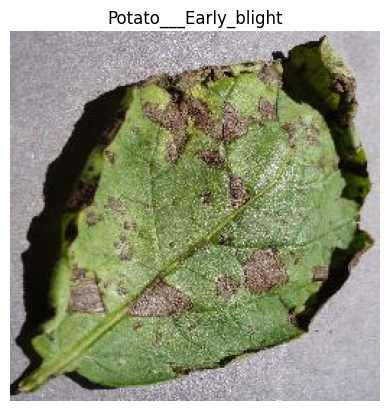

In [ ]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))#imshow expect 3d array
  #above line code give error if data is not in int format
  #till here you will see axis so for hide them use next line
  plt.title(class_names[label_batch[0]])
  plt.axis('off')
#every time we will get new leaf because shuffling is on
#but if want to write type of leaf so for that use title line 5

want to show 12 images

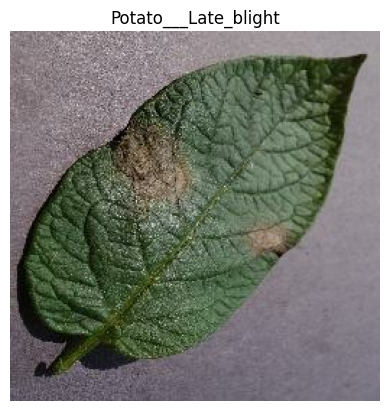

In [ ]:
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.imshow(image_batch[i].numpy().astype("uint8"))#imshow expect 3d array
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
    #this code will show only one image  so you need to use subplot

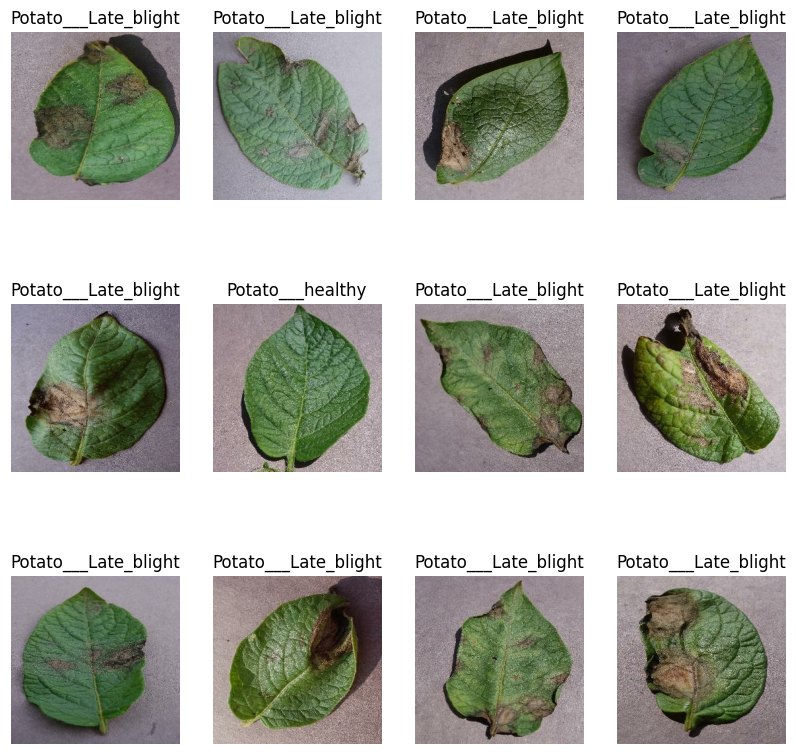

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))#imshow expect 3d array
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
    #it will work but looks messy so increase area by 1st line

In [ ]:
Epochs=50 #no of cycle----one epoch=1 cycle

<font color='blue'>total batch=68<br>
training=80%<br>
test=10%<br>
validation=10%</font>

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)# take 54  batch as training data

In [ ]:
test_ds=dataset.skip(54)# means it will take all 54 onward means after 54

In [ ]:
len(test_ds)

14

in this data we have divide in test and validation

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
#final test dataset
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
# #data splitting in one cell
def dataset_patitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)#length of dataset
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(ds_size*train_split)
  val_size=int(ds_size*val_split)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=dataset_patitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
#cache read the image from disk and keep with it and whenever required it will give  and enhance proformance
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)#prefetch will load next set of batch and enhance the proformance
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<h2><font color='red'>Building the model</font></h2>

Scaling rgb(1-255) in to 0 to 1

In [ ]:
recycle_resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Imaze_Size,Imaze_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data augementation:Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data. like images is rotated or having less contrats changes the result so we use data augementation.



In [ ]:
data_augementation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

<h3><font color='red'>Neural network architecture</font></h3>

In [ ]:
from keras.api._v2.keras import activations
input_shape=(Batch_Size,Imaze_Size,Imaze_Size,channels)
n_class=3
model=models.Sequential([
    recycle_resize,#first do recycle and resize
    data_augementation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),#first convolutionaal  layer----it contain fliters,kernal....,32 come from trial and error
    layers.MaxPooling2D((2,2)),#first pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_class,activation='softmax')#softmax normalize the probability of classes
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

<h3><font color='red'>Compilation</font></h3>

In [ ]:
model.compile(
    optimizer='adam',#famous optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

<h3><font color='red'>Training Network

In [ ]:
history=model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 12s 113ms/step - loss: 0.8953 - accuracy: 0.5058 - val_loss: 0.7318 - val_accuracy: 0.6615
Epoch 2/50
54/54 [==============================] - 3s 62ms/step - loss: 0.6315 - accuracy: 0.7112 - val_loss: 0.6728 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 4s 66ms/step - loss: 0.4084 - accuracy: 0.8264 - val_loss: 0.2972 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 3s 65ms/step - loss: 0.3423 - accuracy: 0.8571 - val_loss: 0.3450 - val_accuracy: 0.8229
Epoch 5/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3002 - accuracy: 0.8860 - val_loss: 0.1910 - val_accuracy: 0.9115
Epoch 6/50
54/54 [==============================] - 3s 63ms/step - loss: 0.2444 - accuracy: 0.9115 - val_loss: 0.3617 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 4s 65ms/step - loss: 0.2203 - accuracy: 0.9120 - val_loss: 0.1667 - val_accuracy: 0.9271
Epoch 8/50
54/54 [====

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 32ms/step - loss: 0.0623 - accuracy: 0.9727


In [ ]:
scores

[0.06230979040265083, 0.97265625]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#to see accuracy history
history.history['accuracy']
len(history.history['accuracy'])

50

<font color='red'>Plotting Graphs</font>

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=acc=history.history['loss']
val_loss=acc=history.history['val_loss']

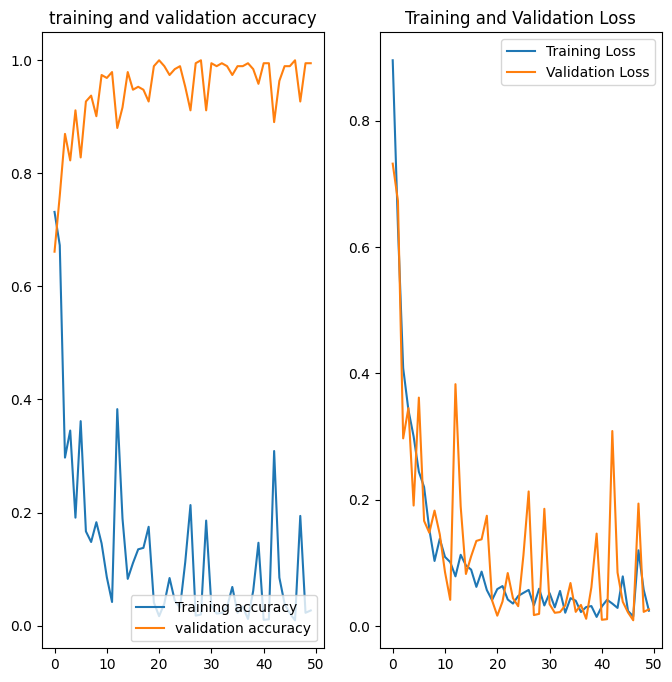

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training accuracy')
plt.plot(range(Epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

#loss chart
plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label Potato___Early_blight
1/1 [==============================] - 0s 143ms/step
predicted label:  Potato___Early_blight


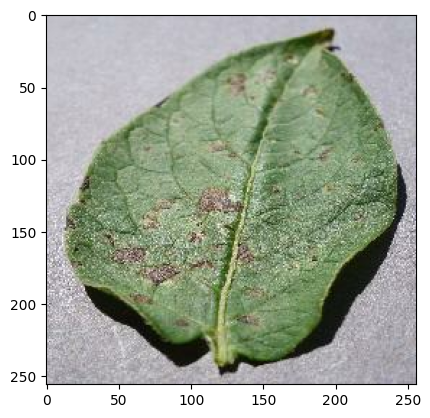

In [ ]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print('actual label',class_names[first_label])

  batch_prediction=model.predict(image_batch)
  print('predicted label: ',class_names[np.argmax(batch_prediction[0])]) #argmax return idex of maximum

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


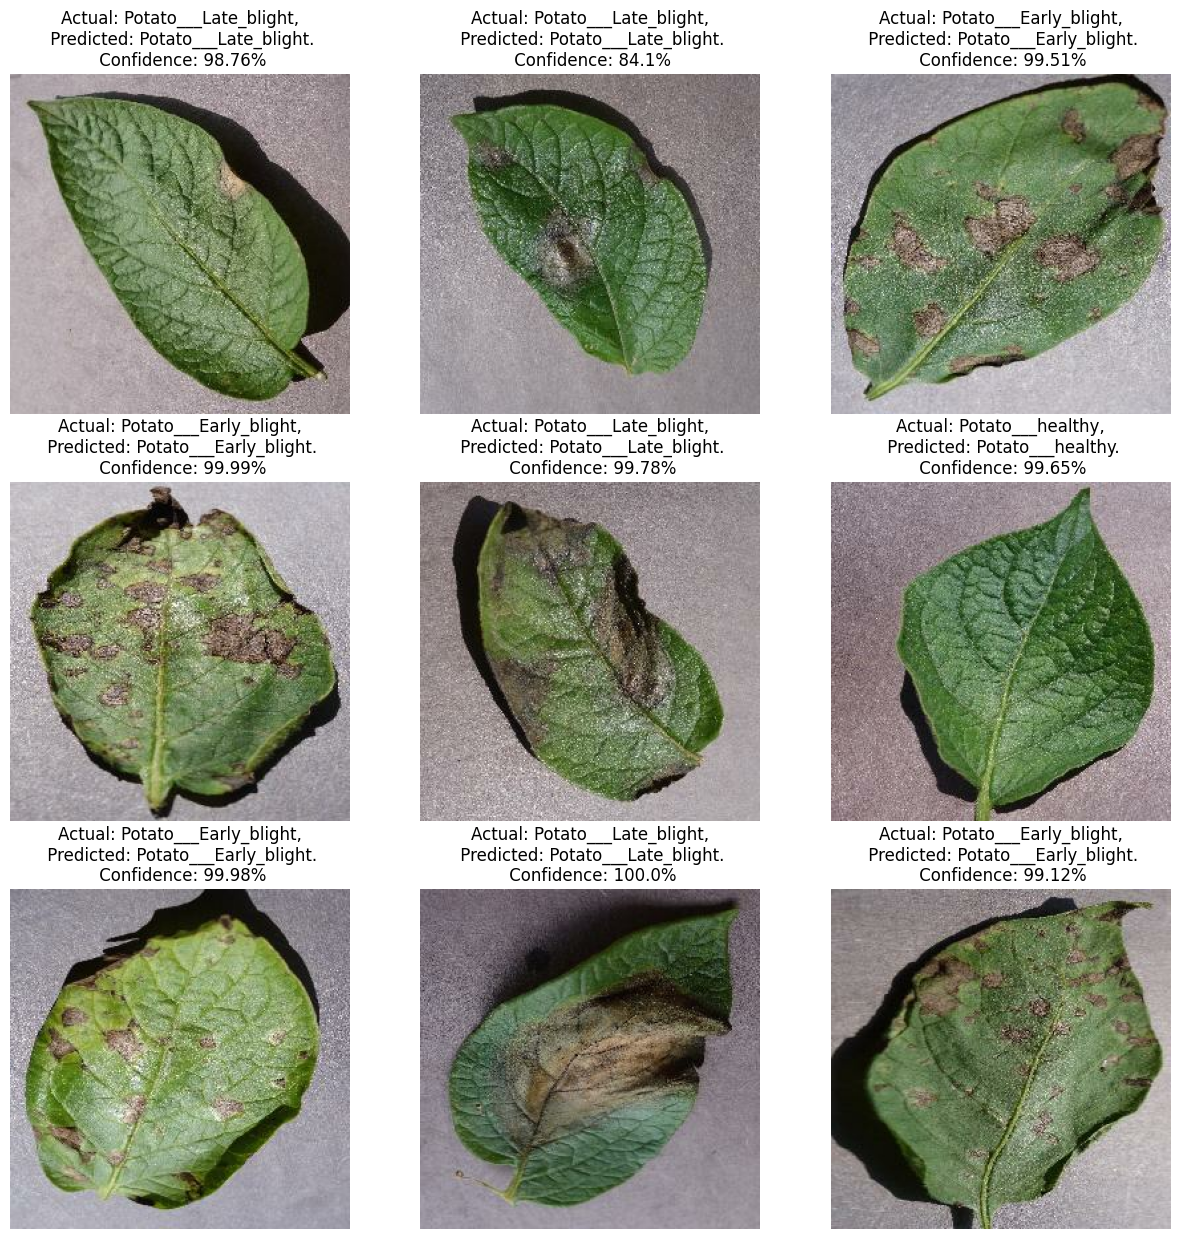

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")